### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
# from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer 

### Choosing the desired configuration

In [4]:
# Tree-Cycles.................................................................
# TopSelect
config_f_name = 'E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'
# Union
# config_f_name = 'E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# Intersection
# config_f_name = 'E8-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'
# Frequency
# config_f_name = 'E9-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'
# Random
# config_f_name = 'E10-TCR-128-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'
# Bidirectional
# config_f_name = 'E12-TCR-128-28_GCN_Ens[OBS+2xiRand+2xRSGG]-Bidirectional.jsonc'
# Stochastic
# config_f_name = 'E13-TCR-128-28_GCN_Ens[OBS+2xiRand+2xRSGG]-Stochastic.jsonc'

# ASD........................................................................
# TopSelect
# config_f_name = 'E1-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'
# Union
# config_f_name = 'E2-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# Intersection
# config_f_name = 'E3-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'
# Frequency
# config_f_name = 'E4-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'
# Random
# config_f_name = 'E5-ASD_ASDO_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'
# Bidirectional
# config_f_name = 'E11-ASD_ASDO_Ens[OBS+2xiRand+2xRSGG]-Bidirectional.jsonc'


### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc


2024-06-06 18:33:26,-295311701 | INFO | 583589 - Executing: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc Run: 2
2024-06-06 18:33:26,-295311692 | INFO | 583589 - Creating the evaluation manager....................................
2024-06-06 18:33:26,-295311684 | INFO | 583589 - Creating the paired  evaluators.....................................
2024-06-06 18:33:26,-295311653 | INFO | 583589 - Created: explanation_runtime
2024-06-06 18:33:26,-295311633 | INFO | 583589 - Created: graph_edit_distance
2024-06-06 18:33:26,-295311615 | INFO | 583589 - Created: correctness
2024-06-06 18:33:26,-295311596 | INFO | 583589 - Created: oracle_calls
2024-06-06 18:33:26,-295311577 | INFO | 583589 - Created: oracle_accuracy
2024-06-06 18:33:26,-295311559 | INFO | 583589 - Created: sparsity
2024-06-06 18:33:26,-295311538 | INFO | 583589 - Created: sparsity
2024-06-06 18:33:26,-295311504 | INFO | 583589 - Instantiating: src.utils.me

/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/src/explainer/generative/gans/graph/res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-06-06 18:33:31,-295307365 | INFO | 583589 - evaluated instance with id 0
2024-06-06 18:33:31,-295307365 | INFO | 583589 - Evaluating instance with id 1
2024-06-06 18:33:33,-295304946 | INFO | 583589 - evaluated instance with id 1
2024-06-06 18:33:33,-295304945 | INFO | 583589 - Evaluating instance with id 2
2024-06-06 18:33:35,-295302568 | INFO | 583589 - evaluated instance with id 2
2024-06-06 18:33:35,-295302566 | INFO | 583589 - Evaluating instance with id 3
2024-06-06 18:33:36,-295301505 | INFO | 583589 - evaluated instance with id 3
2024-06-06 18:33:36,-295301504 | INFO | 583589 - Evaluating instance with id 4
2024-06-06 18:33:37,-295300500 | INFO | 583589 - evaluated instance with id 4
2024-06-06 18:33:37,-295300499 | INFO | 583589 - Evaluating instance with id 5
2024-06-06 18:33:40,-295298072 | INFO | 583589 - evaluated instance with id 5
2024-06-06 18:33:40,-295298071 | INFO | 583589 - Evaluating instance with id 6
2024-06-06 18:33:42,-295295673 | INFO | 583589 - evaluated

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,CorrectnessMetric,CorrectnessMetric-std,OracleCallsMetric,OracleCallsMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,InstabilityMetric,InstabilityMetric-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationTopSelect,0.659345,0.0,5.546875,0.0,1.0,0.0,1218.671875,0.0,0.992188,0.0,0.106835,0.0,0.984375,0.0,0.985922,0.0


### Visualizing individual instances

In [9]:
evaluator = eval_manager.evaluators[0]
evaluator

In [10]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

In [12]:
changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [13]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: []
removed_edges: [(6, 25), (16, 25)]
added nodes: []
removed nodes: []


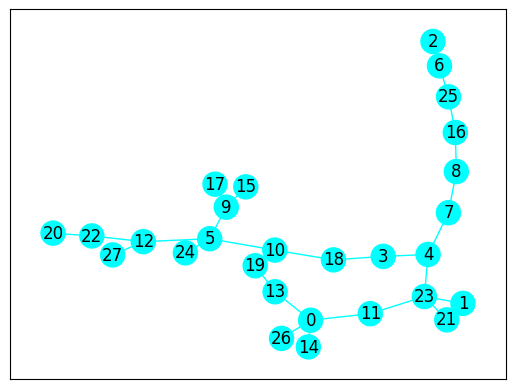

In [14]:
pos = data_analyzer.draw_graph(og_inst)

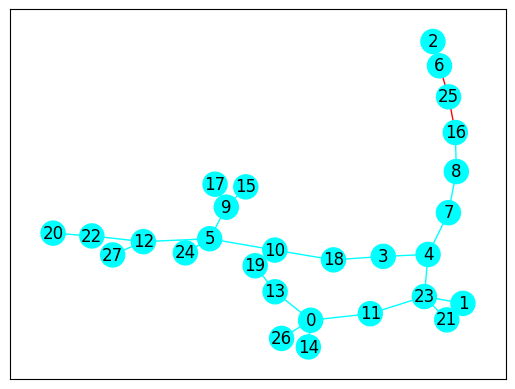

In [15]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [18]:
exp.explainer.name

'ExplanationUnion-550f26dea9a975ab43a0a7601ff14e3b'